In [241]:
#libraries
import pandas as pd #leer el csv
import matplotlib.pyplot as plt #hacer un scatterplot
import random as rnd 
import numpy as np

#clustering functions
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

#silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

#load the iris dataset
from sklearn.datasets import load_iris

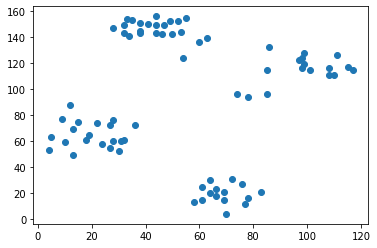

In [242]:
ruspini=pd.read_csv("ruspini.csv",sep=",")
ruspini.describe()

x=ruspini['x']
y=ruspini['y']

#imprimo los datos para ver cuantos k elijo
plot1=plt.scatter(x,y)

#k=4 por lo visto en el grafico
k=4

In [243]:
print(min(x))

4


In [244]:
#generate centroids
cx=[rnd.uniform(min(x),max(x)) for _ in range(4)]
cy=[rnd.uniform(min(y),max(y)) for _ in range(4)]

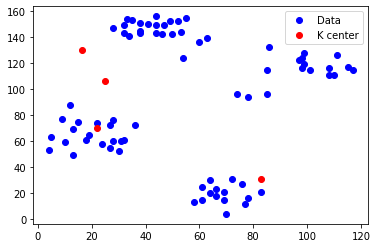

In [245]:
#los muestro
# Supongamos que ya tienes una figura y un eje creados
fig, ax = plt.subplots()

#ploteo
ax.plot(x, y, 'bo', label='Data')
ax.plot(cx, cy, 'ro', label='K center')
# Agrega una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

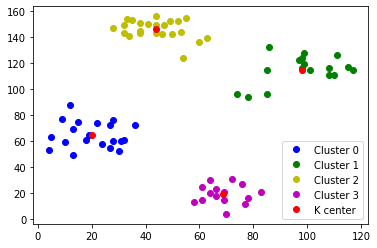

100


In [248]:
#CON FOR 100 veces


#1. calculo la distancia de cada punto a cada centro
#Voy a tener un vector distancias de 4(k)xcant de puntos
#me fijo para cada columna cual es el minimo y ese lo uso para asignarle la categoria


a=0
for i in range(100):
    a+=1
    D=np.zeros((4,len(x)))


    for i in range(len(x)):
        p=np.array([x[i],y[i]]) #1 punto 
        for b in range(k):
            c=np.array([cx[b],cy[b]]) #centroide
            D[b,i]=np.linalg.norm(p-c)

    #hago un vector con las etiquetas de cada punto
    CCL= np.zeros(len(x))
    for i in range(len(x)):
        CCL[i]= np.argmin(D[:,i])#closest centroid label
    
    #print(CCL)
    labels = np.unique(CCL)
    #print(labels)
    

    # ---------------------------------------

    cxNew=[]
    cyNew=[]

    for i in labels:
        cxl=np.mean(x[CCL == i])  #me quedo solo con los que tienen esa etiqueta (mas cercanos a tal punto)
        cyl=np.mean(y[CCL == i]) 
        cxNew.append(cxl)
        cyNew.append(cyl)
        #print(i)
    

    
    
    #tengo los nuevos centroides. Ahora hago un while para que todo esto se repita hsta que todos los centroides sean 
#igual a los anteriores.


cx=cxNew
cy=cyNew


         
        
#los muestro
# Supongamos que ya tienes una figura y un eje creados
fig, ax = plt.subplots()

#ploteo
ax.plot(x[CCL == 0], y[CCL == 0], 'bo', label='Cluster 0')
ax.plot(x[CCL == 1], y[CCL == 1], 'go', label='Cluster 1')
ax.plot(x[CCL == 2], y[CCL == 2], 'yo', label='Cluster 2')
ax.plot(x[CCL == 3], y[CCL == 3], 'mo', label='Cluster 3')

ax.plot(cx, cy, 'ro', label='K center')
# Agrega una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

print(a)

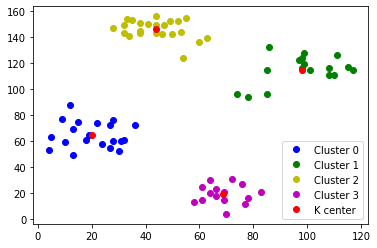

1


In [247]:
#ACA LO HICE CON WHILE PERO 


#1. calculo la distancia de cada punto a cada centro
#Voy a tener un vector distancias de 4(k)xcant de puntos
#me fijo para cada columna cual es el minimo y ese lo uso para asignarle la categoria

#puedo hacerlo sin la matiriz d ni argmin pero es mas visual y mas facil de detectar el error
distintos= True
a=0

while distintos == True:
    a+=1
    D=np.zeros((4,len(x)))


    for i in range(len(x)):
        p=np.array([x[i],y[i]]) #1 punto 
        for b in range(k):
            c=np.array([cx[b],cy[b]]) #centroide
            D[b,i]=np.linalg.norm(p-c)

    #hago un vector con las etiquetas de cada punto
    CCL= np.zeros(len(x))
    for i in range(len(x)):
        CCL[i]= np.argmin(D[:,i])#closest centroid label
    
    #print(CCL)
    labels = np.unique(CCL)
    #print(labels)
    

    # ---------------------------------------

    cxNew=[]
    cyNew=[]

    for i in labels:
        cxl=np.mean(x[CCL == i])  #me quedo solo con los que tienen esa etiqueta (mas cercanos a tal punto)
        cyl=np.mean(y[CCL == i]) 
        cxNew.append(cxl)
        cyNew.append(cyl)
        #print(i)
    

    
    
    #tengo los nuevos centroides. Ahora hago un while para que todo esto se repita hsta que todos los centroides sean 
#igual a los anteriores.

    #verifico que el viejo y el nuevo sean distinto
    for i in range(len(cx)):
        if ((cx[i] != cxNew[i]) and (cy[i] != cyNew[i])):
            distintos=True
            cx=cxNew
            cy=cyNew
        else:
            distintos=False

         
        
#los muestro
# Supongamos que ya tienes una figura y un eje creados
fig, ax = plt.subplots()

#ploteo
ax.plot(x[CCL == 0], y[CCL == 0], 'bo', label='Cluster 0')
ax.plot(x[CCL == 1], y[CCL == 1], 'go', label='Cluster 1')
ax.plot(x[CCL == 2], y[CCL == 2], 'yo', label='Cluster 2')
ax.plot(x[CCL == 3], y[CCL == 3], 'mo', label='Cluster 3')

ax.plot(cx, cy, 'ro', label='K center')
# Agrega una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

print(a)